# Análise de dados - Titanic 

Nesta análise será utilizado a fonte de dados *train.csv* do site https://www.kaggle.com/c/titanic/data

As perguntas inicialmente propostas são: 
    1. Quantos passageiros sobreviveram no acidente?
    2. Sobreviveu mais homens ou mulheres?
    3. Qual a idade do sobrevivente mais novo?
    4. Qual a idade do sobrevivente mais idoso?
    5. Qual a classe em que se encontra o maior número de sobreviventes no návio?
    6. A idade interferiu no fator sobrevivencia?
    7. Os passageiros com maior volume de parentes teve menos sobreviventes?
    8. Qual a quantidade de sobreviventes por local de embarque e classe do návio?
    9. Qual o custo médio do ticket por porto e classe?    
    10. Quantos passageiros embarcaram por porto e classe? 

In [54]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline

In [55]:
#df = pd.read_csv ('data/all/train.csv')
df = pd.read_csv ('C:/Users/eder.rodrigues/Documents/pessoal/estudo/udacity/data/train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## Limpeza e preenchimento das informações faltantes

Após os dados serem carregados para o DataFrame será feita a limpeza das informações que não serão uteis para as análises aqui propostas. E o preenchimento das informações que serão utilizadas, porém, estão com informações faltantes.

In [56]:
df.drop(['Cabin'], axis=1, inplace=True)

Valido se no DataFrame há informações repeditas.

In [57]:
df.duplicated().sum()

0

Como não são todas informações de idade que estão preenchidas, atualizo a informação dos registros que não possuem a informação com a média do DataFrame

In [58]:
mean = df['Age'].mean()
df['Age'].fillna(mean, inplace=True)
df['Embarked'].fillna('N/A', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


In [59]:
# Função utilizada para retornar o percentual de acordo com os parâmetros passados.
def return_percentual (value_counts, count):
    return round((value_counts/count)*100)

## Análise dos dados 

In [60]:
df_survived = df[df['Survived'] > 0]
df_survived.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 1 to 889
Data columns (total 11 columns):
PassengerId    342 non-null int64
Survived       342 non-null int64
Pclass         342 non-null int64
Name           342 non-null object
Sex            342 non-null object
Age            342 non-null float64
SibSp          342 non-null int64
Parch          342 non-null int64
Ticket         342 non-null object
Fare           342 non-null float64
Embarked       342 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 32.1+ KB


In [61]:
survived = return_percentual (df['Survived'].value_counts(), df['Survived'].count())
survived

0    62.0
1    38.0
Name: Survived, dtype: float64

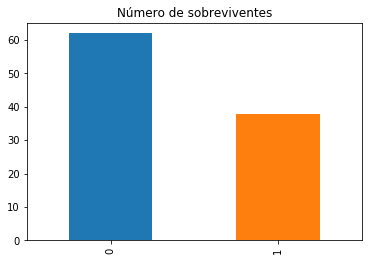

In [62]:
survived.plot(kind='Bar', title='Número de sobreviventes')

Respondendo a primeira pergunta, os números acima mostram que 62% morreram na tragédia e apenas 38% sobreviveram. Para chegar a este resultado, criei um DataFrame contendo apenas sobreviventes e calculei o percentual de sobreviventes neste DataFrame

In [63]:
sex_survived = return_percentual (df_survived['Sex'].value_counts(), df_survived['Sex'].count())
sex_survived

female    68.0
male      32.0
Name: Sex, dtype: float64

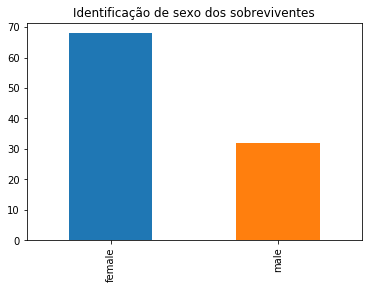

In [64]:
sex_survived.plot(kind='bar', title='Identificação de sexo dos sobreviventes')

Dos sobreviventes, 68% são mulheres enquanto que homens representam apenas 32%. Para chegar a este resultado, utilizei o DataFrame contendo apenas sobreviventes e calculei o percentual de sobreviventes por sexo.

In [65]:
df_survived['Age'].min()

0.42

In [66]:
df_survived['Age'].max()

80.0

Conforme apresentado acima, o passageiro sobrevivente mais novo possuia 0.42 anos enquanto que o mais idoso possuia 80 anos. 

In [67]:
survived_pclass = return_percentual (df_survived['Pclass'].value_counts(), df_survived['Pclass'].count())
survived_pclass

1    40.0
3    35.0
2    25.0
Name: Pclass, dtype: float64

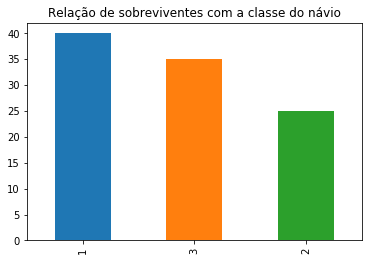

In [68]:
survived_pclass.plot(kind='Bar', title='Relação de sobreviventes com a classe do návio')

Outro fato da análise dos sobreviventes é que apenas 25% se encontravam no meio do návio e o que o maior volume de sobreviventes estavam na parte de cima (40%) e a outra na parte de baixo do návio (30%).

In [69]:
return_percentual (df_survived[df_survived['Age'] > 30].count(), df_survived['Age'].count())[0]

36.0

In [70]:
return_percentual (df_survived[df_survived['Age'] <= 30].count(), df_survived['Age'].count())[0]

64.0

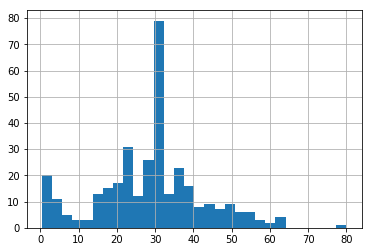

In [71]:
df_survived['Age'].hist(bins=30)

In [72]:
df_survived['Age'].describe()

count    342.000000
mean      28.549778
std       13.772498
min        0.420000
25%       21.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

Pelo apresentado abaixo, houveram um numero maior de sobreviventes com idade inferior a 30 anos. Pelos dados 64% dos sobreviventes tinham até 30 anos enquanto que acima de 30 anos sobreviveram apenas 36% dos tripulantes. A média de idade dos tripulantes sobreviventes era de 28 anos.

In [73]:
df_parents = df.loc[(df['Parch'] > 0) | df['SibSp'] > 0]

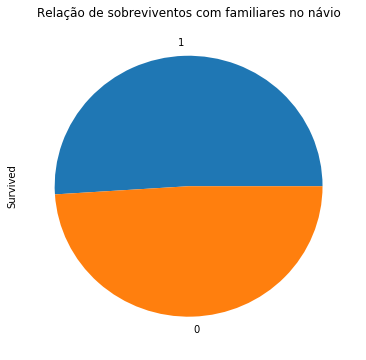

In [80]:
survived_with_parents = return_percentual (df_parents['Survived'].value_counts(), df_parents['Survived'].count())
survived_with_parents.plot(kind='pie', title='Relação de sobreviventos com familiares no návio', figsize=(6,6))

Pelos dados apresentados acima, teve um maior número de sobreviventes os passageiros que tinham parentes no návio, porém, o resultado apresentado é bem similar, sendo 51% dos sobreviventes possuiam parentes no návio enquanto que 49% tinham parentes e morreram na tragédia.

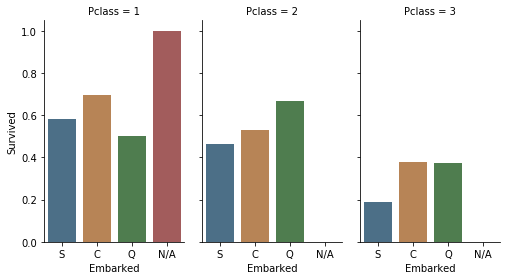

In [75]:
sns.factorplot(x="Embarked", y="Survived", col="Pclass", data=df, saturation=.4, kind="bar", ci=None, aspect=.6)

Acima a distribuição dos sobreviventes por classe do návio e local de embarque

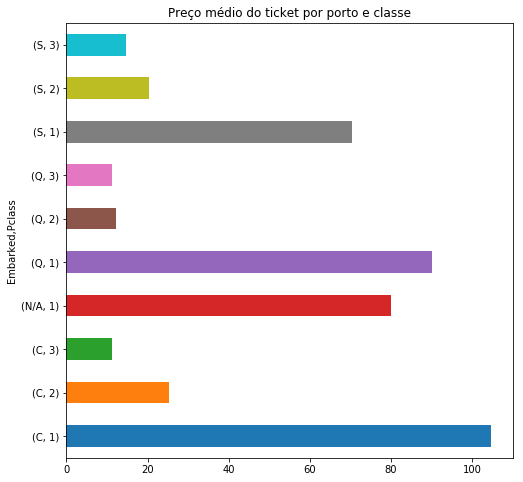

In [76]:
df.groupby(['Embarked', 'Pclass'])['Fare'].mean().plot(kind='barh', title='Preço médio do ticket por porto e classe', figsize=(8,8))

Acima é apresentado a distribuição do preço médio pago pelos passageiros de acordo com o porto e a classe dos mesmos. 

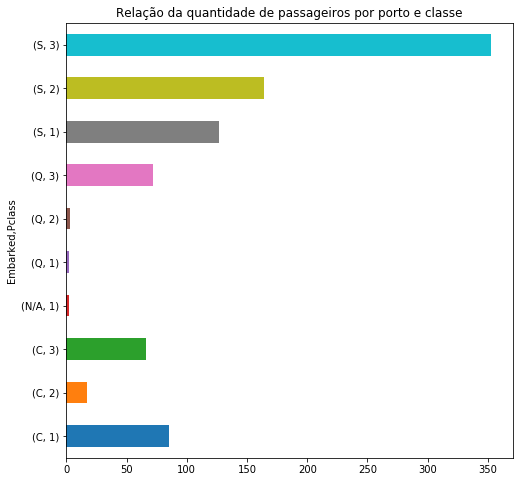

In [77]:
df.groupby(['Embarked', 'Pclass'])['Fare'].count().plot(kind='barh', title='Relação da quantidade de passageiros por porto e classe', figsize=(8,8))

Acima é apresentado a quantidade de passageiros que embarcaram no návio de acordo com o porto e a classe dos mesmos. 

## Referencias utilizadas
https://stackoverflow.com/questions/17071871/select-rows-from-a-dataframe-based-on-values-in-a-column-in-pandas

https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.DataFrame.plot.html

http://www.vitormeriat.com.br/2017/03/18/titanic-machine-learning-from-disaster/

https://seaborn.pydata.org/generated/seaborn.catplot.html

## Resultado Final

Para realização das análises acima foram utilizados gráficos de barra, colunas e um histograma com o objetivo de responder aos questionamentos feitos logo no início da análise dos dados aqui mesmo neste notebook.
Todos as análise foram realizadas utilizando o panda DataFrame com o matplotlib e o seaborn para apresentação dos gráficos. 

Através das análises foi possível identificar os seguintes resultados:
    1. 62% das pessoas morreram na tragédia e apenas 38% sobreviveram, isso levando em consideração o conjunto de informações presentes na fonte utilizada;
    2. Dos sobreviventes, 68% são mulheres enquanto que homens representam apenas 32%;
    3. As classes 1 e 3 são as que contém o maior números de sobreviventes;
    4. O maior volume de sobreviventes tinha até 30 anos e esse fato representa 64% dos sobreviventes;
    5. 51% dos sobreviventes tinham parentes no návio enquanto 49% não tinha;
    6. Da classe 1 o maior número de sobreviventes embarcaram em Cherbourg enquanto que na classe 2 o maior volume de sobreviventes embarcaram em Queenstown e na classe 3 os valores são bem próximos entre Cherbourg e Queenstown.
